# Multiple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [64]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset

In [ ]:
print(X)

## Visuallize data

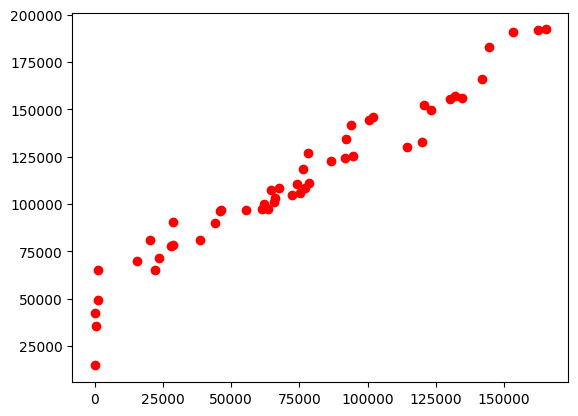

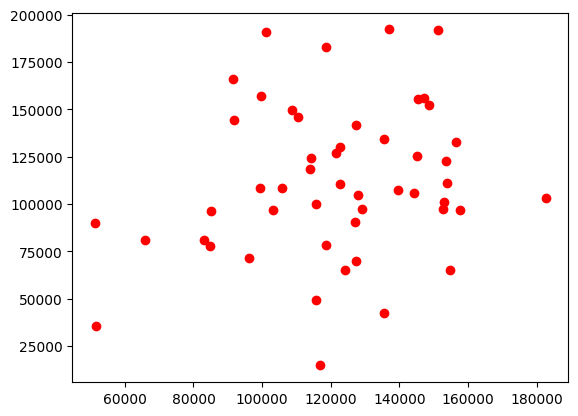

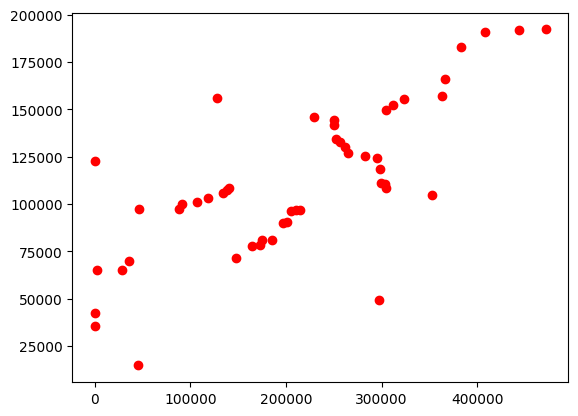

In [29]:
for i in range(len(X[0]) - 1):
  plt.scatter(X[:, i], y, color = 'red')
  plt.show()

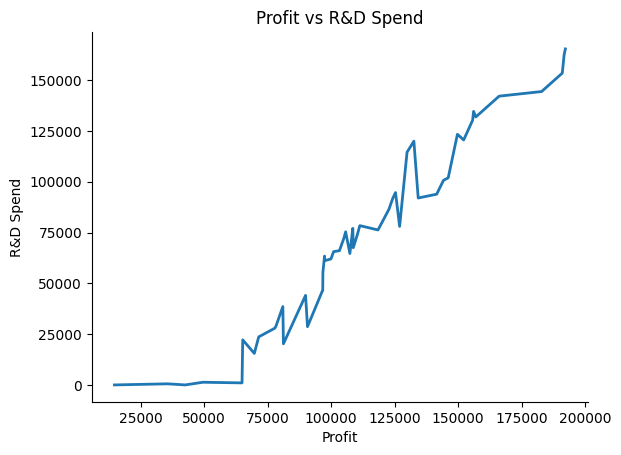

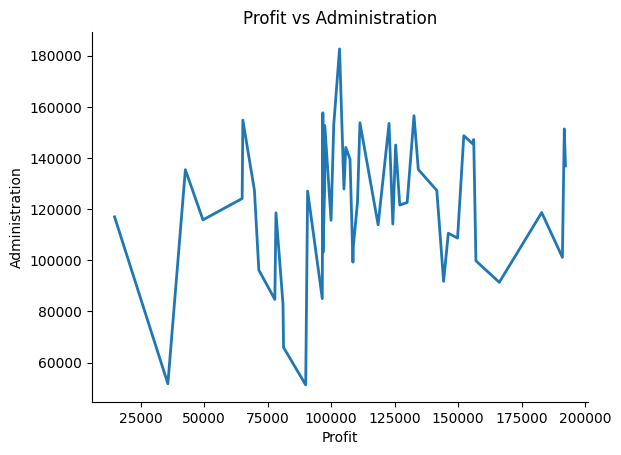

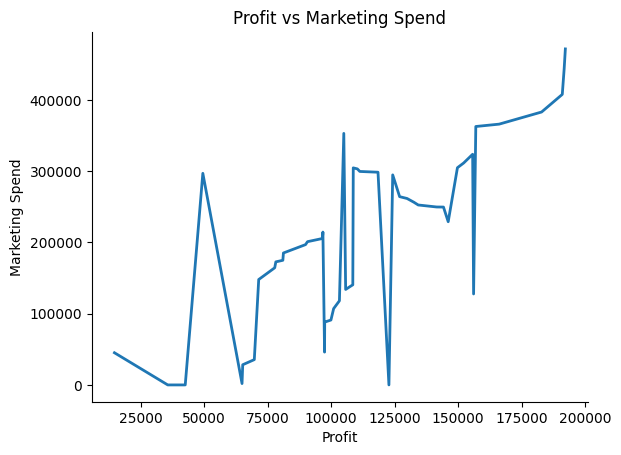

In [55]:
from matplotlib import pyplot as plt
for col in dataset:
  if col != 'State' and col != 'Profit':
    plt.figure()
    plt.plot(dataset['Profit'], dataset[col], linewidth=2)
    plt.ylabel(col)
    plt.xlabel('Profit')
    plt.title(f'Profit vs {col}')
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

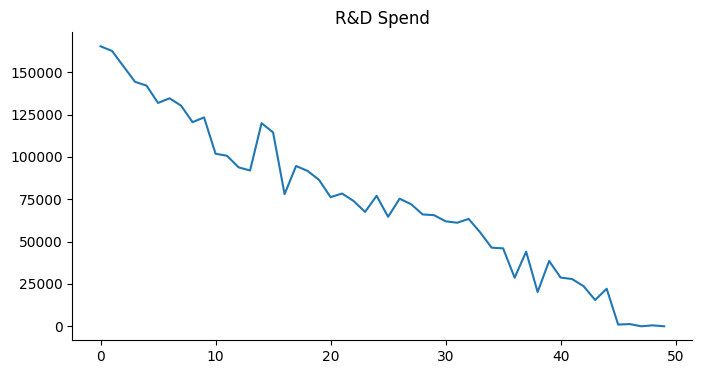

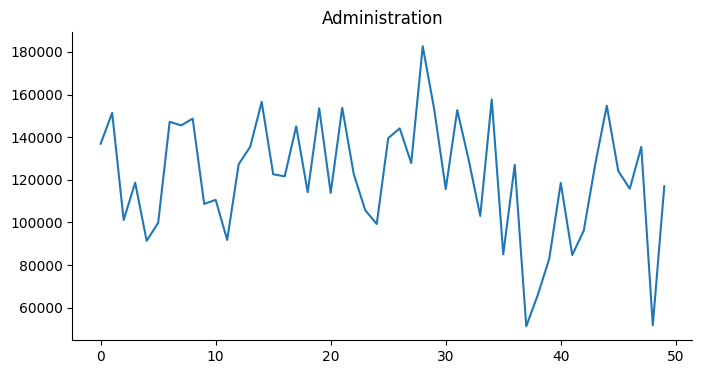

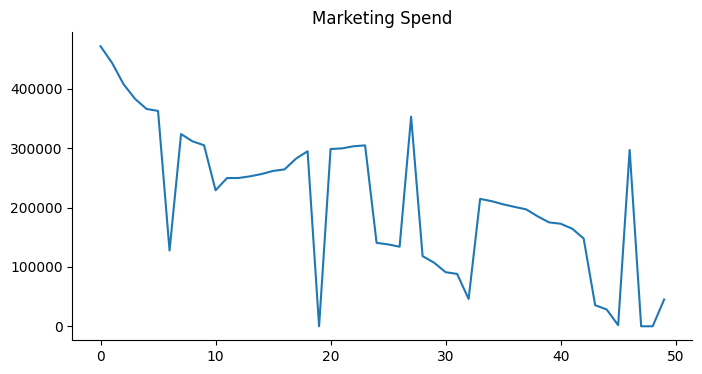

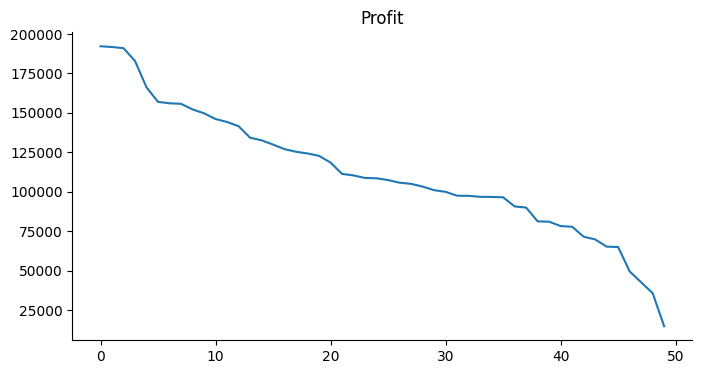

In [47]:
from matplotlib import pyplot as plt
for col in dataset:
  if col != 'State':
    dataset[col].plot(kind='line', figsize=(8, 4), title=col)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

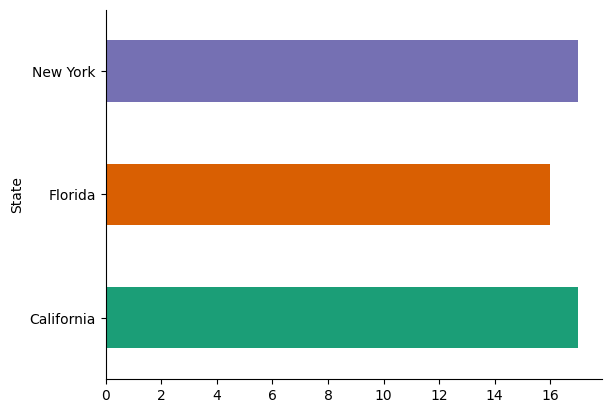

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

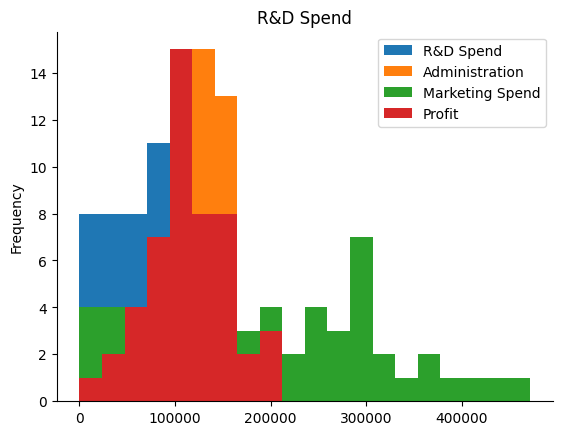

In [32]:
from matplotlib import pyplot as plt
dataset.plot(kind='hist', bins=20, title='R&D Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

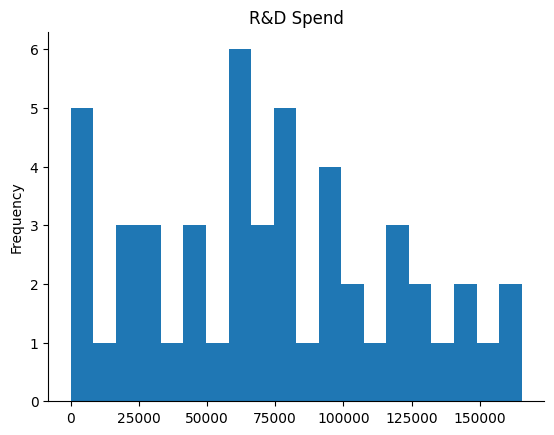

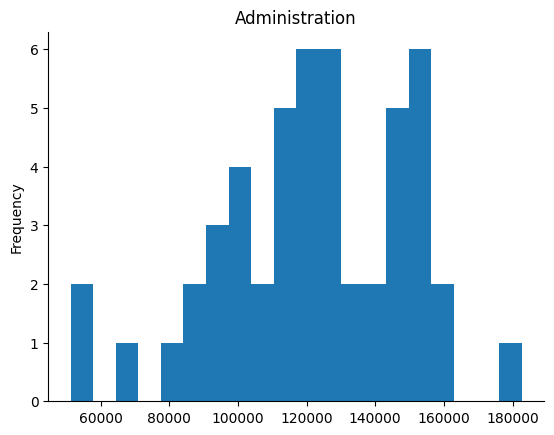

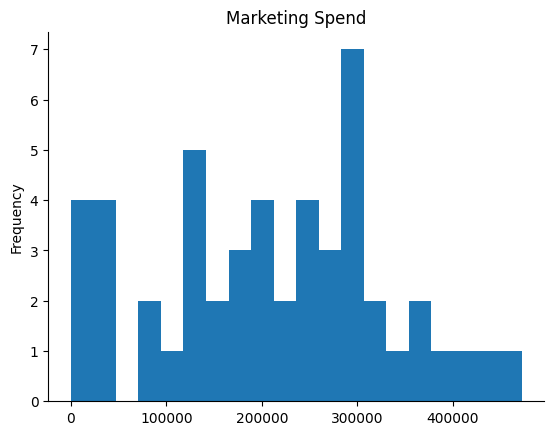

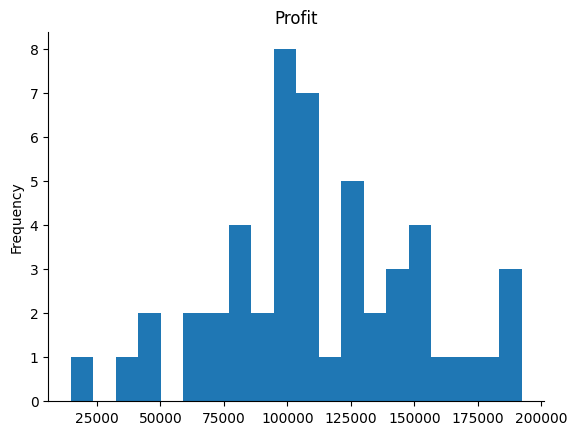

In [39]:
from matplotlib import pyplot as plt
for col in dataset:
  if col != 'State':
    dataset[col].plot(kind='hist', bins=20, title=col)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])])
temp = np.array(ct.fit_transform(X))

X = np.concatenate((X[:, :3], temp), axis=1)

In [67]:
X

array([[165349.2, 136897.8, 471784.1, 0.0, 0.0, 1.0],
       [162597.7, 151377.59, 443898.53, 1.0, 0.0, 0.0],
       [153441.51, 101145.55, 407934.54, 0.0, 1.0, 0.0],
       [144372.41, 118671.85, 383199.62, 0.0, 0.0, 1.0],
       [142107.34, 91391.77, 366168.42, 0.0, 1.0, 0.0],
       [131876.9, 99814.71, 362861.36, 0.0, 0.0, 1.0],
       [134615.46, 147198.87, 127716.82, 1.0, 0.0, 0.0],
       [130298.13, 145530.06, 323876.68, 0.0, 1.0, 0.0],
       [120542.52, 148718.95, 311613.29, 0.0, 0.0, 1.0],
       [123334.88, 108679.17, 304981.62, 1.0, 0.0, 0.0],
       [101913.08, 110594.11, 229160.95, 0.0, 1.0, 0.0],
       [100671.96, 91790.61, 249744.55, 1.0, 0.0, 0.0],
       [93863.75, 127320.38, 249839.44, 0.0, 1.0, 0.0],
       [91992.39, 135495.07, 252664.93, 1.0, 0.0, 0.0],
       [119943.24, 156547.42, 256512.92, 0.0, 1.0, 0.0],
       [114523.61, 122616.84, 261776.23, 0.0, 0.0, 1.0],
       [78013.11, 121597.55, 264346.06, 1.0, 0.0, 0.0],
       [94657.16, 145077.58, 282574.31, 0.

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [57]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [74]:
print(pd.DataFrame(np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)))
print()
print(pd.DataFrame(np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)))


      0    1    2          3          4          5          6
0   0.0  1.0  0.0   55493.95  103057.49  214634.81   96778.92
1   0.0  0.0  1.0   46014.02   85047.44  205517.64   96479.51
2   0.0  1.0  0.0   75328.87  144135.98  134050.07  105733.54
3   1.0  0.0  0.0   46426.07  157693.92  210797.67    96712.8
4   0.0  1.0  0.0   91749.16  114175.79  294919.57   124266.9
5   0.0  1.0  0.0  130298.13  145530.06  323876.68   155752.6
6   0.0  1.0  0.0  119943.24  156547.42  256512.92  132602.65
7   0.0  0.0  1.0    1000.23  124153.04    1903.93   64926.08
8   0.0  0.0  1.0     542.05   51743.15        0.0   35673.41
9   0.0  0.0  1.0   65605.48  153032.06  107138.38  101004.64
10  0.0  0.0  1.0  114523.61  122616.84  261776.23  129917.04
11  0.0  1.0  0.0   61994.48  115641.28   91131.24   99937.59
12  1.0  0.0  0.0   63408.86  129219.61   46085.25   97427.84
13  1.0  0.0  0.0   78013.11  121597.55  264346.06  126992.93
14  1.0  0.0  0.0   23640.93   96189.63  148001.11   71498.49
15  1.0 

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

## Predicting the Test set results

In [97]:
y_pred = regressor.predict(X_test)

In [100]:
y_pred.reshape(-1, 1)

array([[103015.2 ],
       [132582.28],
       [132447.74],
       [ 71976.1 ],
       [178537.48],
       [116161.24],
       [ 67851.69],
       [ 98791.73],
       [113969.44],
       [167921.07]])

In [99]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [101]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


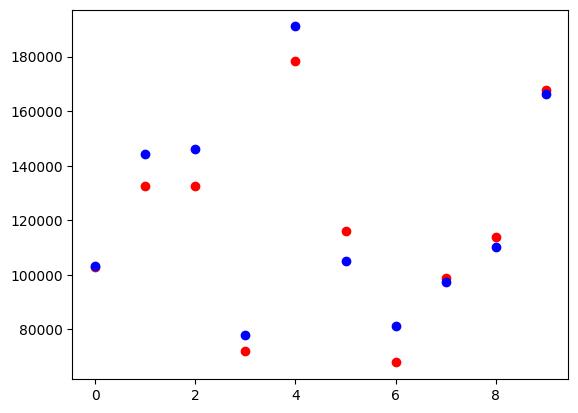

In [94]:
plt.scatter(x=range(len(y_pred)), y=y_pred, color='red')
plt.scatter(x=range(len(y_pred)), y=y_test, color='blue')
plt.show()

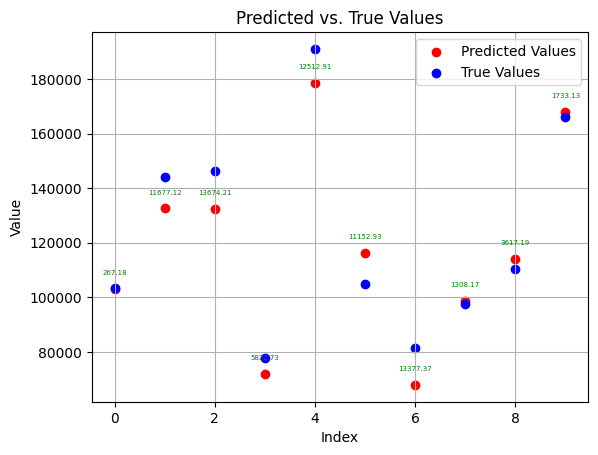

In [111]:
# Assuming y_pred and y_test are your predicted and true values (replace with your actual data)
plt.scatter(x=range(len(y_pred)), y=y_pred, color='red', label="Predicted Values")
plt.scatter(x=range(len(y_pred)), y=y_test, color='blue', label="True Values")

# Calculate difference
difference = abs(y_pred - y_test)

# Add annotations with difference values (adjust positioning as needed)
for i, (x, y, diff) in enumerate(zip(range(len(y_pred)), y_pred, difference)):
  plt.annotate(f"{diff:.2f}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', c='green', size=5)

# Labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Predicted vs. True Values")

plt.legend()
plt.grid(True)
plt.show()

# Extra

In [ ]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [ ]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()X_opt = X[:, [0, 1, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()X_opt = X[:, [0, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()X_opt = X[:, [0, 3, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()X_opt = X[:, [0, 3]]
X_opt = X_opt.astype(np.float64)regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()